In [1]:
import pandas as pd
from pandas import Series
import json
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
items = list()
with open("eth-eur.json") as f:
    raw = json.load(f)
    
    for idx,timestamp in enumerate(raw['chart']['result'][0]['timestamp']):
        i = dict()
        i['timestamp'] = timestamp
        items.append(i)
        
        
    def append(items, name):
        for idx,i in enumerate(raw['chart']['result'][0]['indicators']['quote'][0][name]):
            items[idx][name] = i
        
    append(items, "open")
    append(items, "high")
    append(items, "volume")
    append(items, "close")
    append(items, "low")

print(items[0])
print(items[1])




{'timestamp': 1515283200, 'open': 831.1199951171875, 'high': 831.9099731445312, 'volume': 2046, 'close': 831.8599853515625, 'low': 831.1199951171875}
{'timestamp': 1515283320, 'open': 831.8699951171875, 'high': 831.8699951171875, 'volume': 19420, 'close': 831.7899780273438, 'low': 831.0399780273438}


df = pd.DataFrame(data=items[:5000])
df['time'] = pd.to_datetime(df['timestamp'], unit='s')

span = 30 # 6h

df['close-avg'] = df['close'].rolling(window=span).mean()
df['close-eavg'] = df['close-avg'].ewm(span=span, adjust=False).mean()
df['close-deviation'] = df['close-avg'].rolling(window=span).std()

# c_m(x) = |f(x) - g(x)| - m * h(x)
m = 5
df['close-outliers'] = df['close'].abs() - df['close-avg'].abs() - m * df['close-deviation']
df['close-mins'] = df[df['close-outliers'] > 2 ].close

fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(1,1,1)

ax.plot(df["time"], df["close"], label='bht-eth')
ax.plot(df["time"], df["close-avg"], label = 'moving average')
ax.plot(df["time"], df["close-eavg"], label = 'exponential moving average')
ax.plot(df["time"], df["close-mins"], label = 'local minimum', linewidth=4, color="red")
#ax.plot(short_rolling.ix[start_date:end_date, :].index, short_rolling.ix[start_date:end_date, 'MSFT'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in btc-eth')
#ax.xaxis.set_major_formatter(my_year_month_fmt)

#df.plot(x="time", y="close-avg")

Text(0,0.5,'Price in btc-eth')

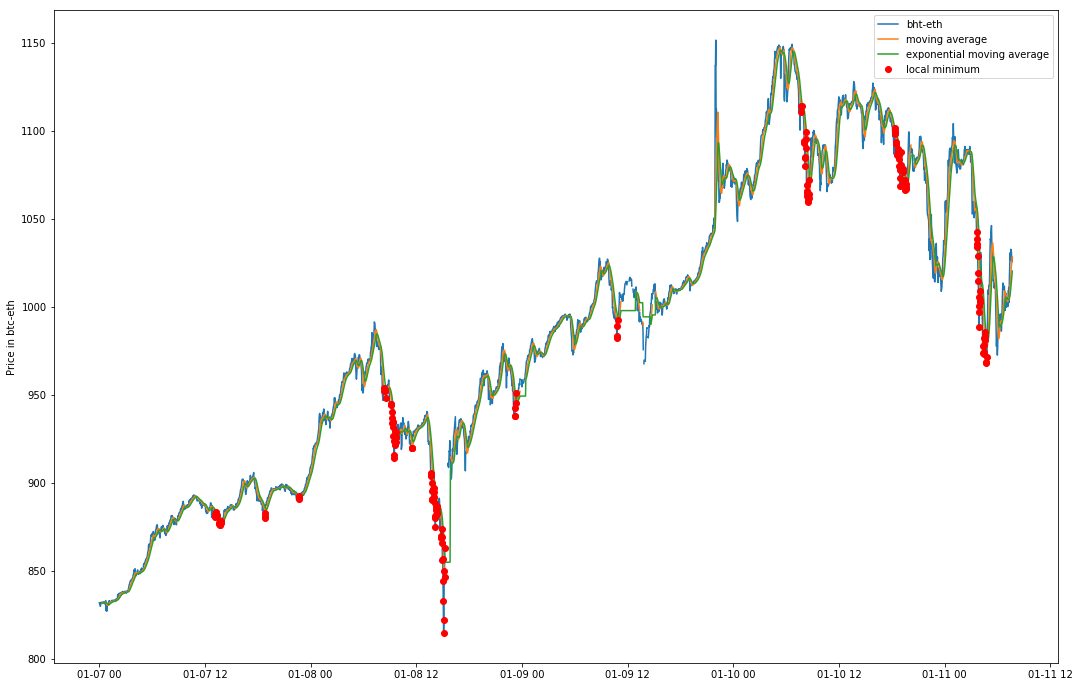

In [93]:
df = pd.DataFrame(data=items[:])
df['time'] = pd.to_datetime(df['timestamp'], unit='s')

span = 10 # 6h
span2= 100

df['close-avg'] = df['close'].rolling(window=span).mean()
df['close-eavg'] = df['close-avg'].ewm(span=span, adjust=False).mean()
df['close-deviation'] = df['close-avg'].rolling(window=span).std()

# c_m(x) = |f(x) - g(x)| - m * h(x)
m = 5
df['close-outliers'] = df['close'].abs() - df['close-eavg'].abs() - m * df['close-deviation']
df['close-mins'] = df[df['close-outliers'] > 0].close

df['close-mx'] = df['close-avg'].rolling(window=span2).min()
df['close-m'] = df[df['close-mx'] == df['close-avg']].close

fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(1,1,1)

ax.plot(df["time"], df["close"], label='bht-eth')
ax.plot(df["time"], df["close-avg"], label = 'moving average')
ax.plot(df["time"], df["close-eavg"], label = 'exponential moving average')
ax.plot(df["time"], df["close-m"], 'o', label = 'local minimum', linewidth=4, color="red")
#ax.plot(short_rolling.ix[start_date:end_date, :].index, short_rolling.ix[start_date:end_date, 'MSFT'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in btc-eth')
#ax.xaxis.set_major_formatter(my_year_month_fmt)

#df.plot(x="time", y="close-avg")

In [50]:
df

,close,high,low,open,timestamp,volume,time,close-avg,close-eavg,close-deviation,close-outliers,close-mins
0,831.859985,831.909973,831.119995,831.119995,1515283200,2046.0,2018-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN
1,831.789978,831.869995,831.039978,831.869995,1515283320,19420.0,2018-01-07 00:02:00,NaN,NaN,NaN,NaN,NaN
2,831.789978,831.799988,831.000000,831.780029,1515283440,13334.0,2018-01-07 00:04:00,NaN,NaN,NaN,NaN,NaN
3,830.630005,831.570007,830.630005,830.969971,1515283560,66731.0,2018-01-07 00:06:00,NaN,NaN,NaN,NaN,NaN
4,829.880005,831.140015,829.679993,830.770020,1515283680,27198.0,2018-01-07 00:08:00,NaN,NaN,NaN,NaN,NaN
5,831.900024,831.900024,830.479980,830.609985,1515283800,253860.0,2018-01-07 00:10:00,NaN,NaN,NaN,NaN,NaN
6,832.099976,832.099976,831.869995,831.960022,1515283920,17030.0,2018-01-07 00:12:00,NaN,NaN,NaN,NaN,NaN
7,832.119995,832.119995,832.099976,832.099976,1515284040,80513.0,2018-01-07 00:14:00,NaN,NaN,NaN,NaN,NaN
8,832.109985,832.119995,832.020020,832.119995,1515284160,154236.0,2018-01-07 00:16:00,NaN,NaN,NaN,NaN,NaN
9,831.489990,832.109985,831.460022,832.109985,1515284280,22927.0,2018-01-07 00:18:00,NaN,NaN,NaN,NaN,NaN
